## Imports

In [81]:
import numpy as np
import cv2
import os
from skimage.feature import hog
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog

## Load Dataset

In [44]:
car_filenames = []
not_car_filenames = []

dir_name = './vehicles/vehicles/'
for path, dirs, files in os.walk(dir_name):
    for file in files:
        if file == '.DS_Store' : continue
        name = path  +'/' + file
        car_filenames.append(name)
        
dir_name2 = './non-vehicles/non-vehicles/'
for path, dirs, files in os.walk(dir_name2):
    for file in files:
        if file == '.DS_Store' : continue
        name = path  +'/' + file
        not_car_filenames.append(name)

In [45]:
img1=cv2.imread(not_car_filenames[2])
img2=cv2.imread(car_filenames[89])
img3=cv2.imread(car_filenames[53])
cv2.imshow('img1',img1)
cv2.imshow('img2',img2)
cv2.imshow('img3',img2)
cv2.waitKey()
cv2.destroyAllWindows()

In [133]:
car_labels = [1] * len(car_filenames)
not_car_labels = [0] * len(not_car_filenames)

## Basic Summary of Dataset

In [134]:
len(car_filenames),len(not_car_filenames)

(8792, 8968)

In [135]:
len(car_labels), len(not_car_labels)

(8792, 8968)

In [47]:
for i in range(5):
    ldx=np.random.randint(len(car_filenames))
    car_filenames_shape=cv2.imread(car_filenames[ldx]).shape
    print(car_filenames_shape)

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [48]:
for i in range(5):
    ldx=np.random.randint(len(not_car_filenames))
    car_filenames_shape=cv2.imread(not_car_filenames[ldx]).shape
    print(car_filenames_shape)

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


## Visualize Some of the Data

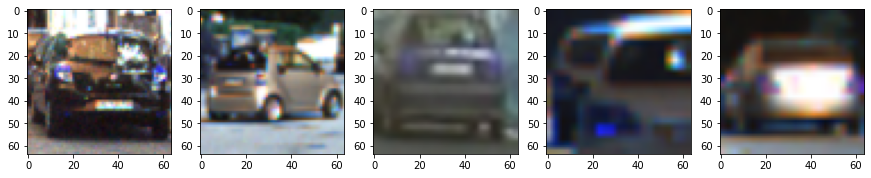

In [49]:
fig = plt.figure(figsize=(15,3))
for i in range(5):
    idx = np.random.randint(len(car_filenames))
    img = cv2.imread(car_filenames[idx])
    plt.subplot(1, 5, i+1)
    plt.imshow(img)

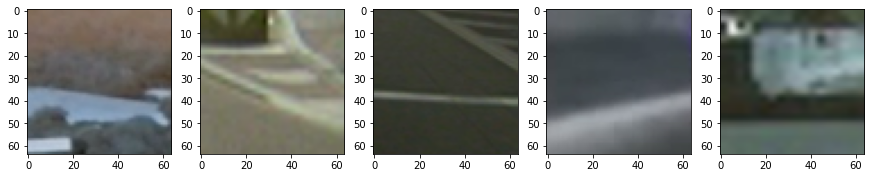

In [50]:
fig = plt.figure(figsize=(15,3))
for i in range(5):
    idx = np.random.randint(len(not_car_filenames))
    img = cv2.imread(not_car_filenames[idx])
    plt.subplot(1, 5, i+1)
    plt.imshow(img)

## Feature Extraction Method

In [103]:
features=[]

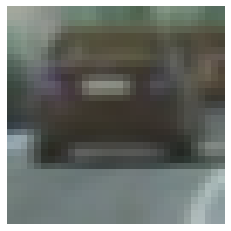

In [113]:
# Raw pixel intensity : (Color and Shape)
image = cv2.imread(car_filenames[1])
image_32x32 = cv2.resize(image, (32, 32))

image_f = image_32x32.flatten()

plt.imshow(image_32x32, cmap="gray"), plt.axis("off") 
plt.show()

In [105]:
image_32x32.shape

(32, 32, 3)

In [106]:
image_f.shape

(3072,)

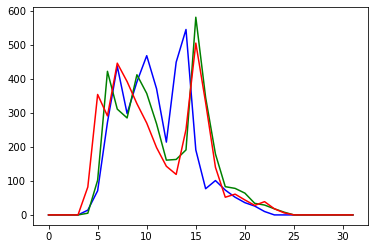

In [114]:
# Histogram of pixel intensity : (Color only)
color_list = ['b', 'g', 'r']

hist_f = np.array([])

for i in range(3):
    hist = cv2.calcHist(images=[image], channels=[i], mask=None, histSize=[32], ranges=[0, 255]).flatten()
    hist_f = np.r_[hist_f, hist]
        
    plt.plot(hist, color=color_list[i])

In [108]:
hist_f.shape

(96,)

In [109]:
type(hist_f)

numpy.ndarray

In [115]:
# Gradients of pixel intensity : (Shape only)

image2 = cv2.imread(car_filenames[1], cv2.IMREAD_GRAYSCALE)

hog_feature, hog_image = hog(image2, orientations=9, pixels_per_cell=(8,8),
                            cells_per_block=(2,2),
                            block_norm='L2-Hys', transform_sqrt=False,
                            visualize=True, feature_vector= True)


In [116]:
hog_feature.shape

(1764,)

In [118]:
np.r_[image_f, hist_f, hog_feature].shape

(4932,)

In [119]:
features.append(np.r_[image_f, hist_f, hog_feature])

In [120]:
len(features)

1

## Feature Extraction

In [121]:
features = []

In [122]:
for i in range(len(car_filenames)):
    
    image = cv2.imread(car_filenames[i])
    image_32x32 = cv2.resize(image, (32, 32))

    image_f = image_32x32.flatten()


    color_list = ['b', 'g', 'r']

    hist_f = np.array([])

    for i in range(3):
        hist = cv2.calcHist(images=[image], channels=[i], mask=None, histSize=[32], ranges=[0, 255]).flatten()
        hist_f = np.r_[hist_f, hist]

    image2 = cv2.imread(car_filenames[i], cv2.IMREAD_GRAYSCALE)

    hog_feature, hog_image = hog(image2, orientations=9, pixels_per_cell=(8,8),
                                cells_per_block=(2,2),
                                block_norm='L2-Hys', transform_sqrt=False,
                                visualize=True, feature_vector= True)

    features.append(np.r_[image_f, hist_f, hog_feature])

In [123]:
len(features)

8792

In [124]:
features[0].shape

(4932,)

In [125]:
for i in range(len(not_car_filenames)):
    
    image = cv2.imread(not_car_filenames[i])
    image_32x32 = cv2.resize(image, (32, 32))

    image_f = image_32x32.flatten()


    color_list = ['b', 'g', 'r']

    hist_f = np.array([])

    for i in range(3):
        hist = cv2.calcHist(images=[image], channels=[i], mask=None, histSize=[32], ranges=[0, 255]).flatten()
        hist_f = np.r_[hist_f, hist]

    image2 = cv2.imread(not_car_filenames[i], cv2.IMREAD_GRAYSCALE)

    hog_feature, hog_image = hog(image2, orientations=9, pixels_per_cell=(8,8),
                                cells_per_block=(2,2),
                                block_norm='L2-Hys', transform_sqrt=False,
                                visualize=True, feature_vector= True)

    features.append(np.r_[image_f, hist_f, hog_feature])

In [126]:
len(features)

17760

In [127]:
features[10].shape

(4932,)

## Data Preparation

In [160]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

In [161]:
labels=car_labels+not_car_labels

In [162]:
len(labels)

17760

In [163]:
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,
                                               stratify=labels,random_state=42)

In [167]:
scaler=StandardScaler()
scaled_train=scaler.fit_transform(X_train)
scaled_test=scaler.transform(X_test)

## Classifier

In [189]:
svm_c=LinearSVC()

In [190]:
svm_c.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [191]:
svm_c.score(X_train, y_train)

0.9968327702702703

In [192]:
pred=svm_c.predict(X_test)

In [193]:
from sklearn.metrics import accuracy_score

In [194]:
accuracy_score(y_test,pred)

0.9628378378378378

In [195]:
from sklearn.model_selection import GridSearchCV

In [199]:
param_grid=[{'C':[0.1]}]

grid_search = GridSearchCV(svm_c,param_grid=param_grid,scoring="accuracy",cv=5,n_jobs=-1)

grid_search.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1, param_grid=[{'C': [0.1]}],
             scoring='accuracy')

In [197]:
grid_search.best_params_

{'C': 0.9}

## Data Saving to Pickle